## Adult Census Income Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `Income` of given `Adult Census` **(Classification Analysis).**

### About the project:

**The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the**
`>50K group or <=50K group.`

### Tasks performed in this notebook:

1. Raw Data Importing*
2. Raw Data Cleaning (& analyzing)*
3. Cleaned Data Exporting*

**The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.**

In [1]:
## Importing necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("census.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df = data.copy()

In [6]:
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)

In [7]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [8]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [9]:
#total rows and columns in dataset
df.shape

(32561, 12)

In [10]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [11]:
#encoding salary column
df['salary']=df['salary'].replace('<=50K',0)
df['salary']=df['salary'].replace('>50K',1)

In [12]:
#people whose earning less than 50K
df[df['salary']==0].shape

(24720, 12)

In [13]:
#people whose earning more than 50K
df[df['salary']==1].shape

(7841, 12)

In [14]:
#cleaning rows
#This code snippet is used to clean rows from a DataFrame df that contain the value '?' in any of its columns. 
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [15]:
#check null values
df.isnull().sum()  #no null value in dataset

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
country           0
salary            0
dtype: int64

In [16]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [17]:
#doing private job and salary more than 50K
new_df=df[df['workclass']=='Private']
print(len(new_df[new_df['salary']==1]))
new_df[new_df['salary']==1].head()

4876


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
20,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,1
52,47,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,1


* . ***so there is 4876 people are doing job in private class and earn more than 50K***

<AxesSubplot:xlabel='salary'>

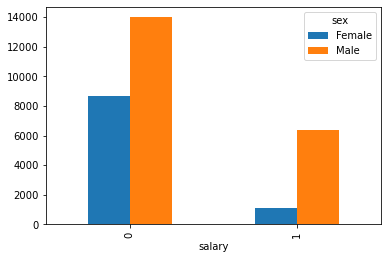

In [18]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['salary'],df['sex'])
class_sex.plot(kind='bar')

In [19]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [20]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==0]))
avg_age[avg_age['salary']==0].head()

8911


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
21,54,Private,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,20,United-States,0


* . **so there is '5042' people whose age is greater than average age earning more than 50K**

In [21]:
#how many of people whose age above avarge earn less than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==0]))
avg_age[avg_age['salary']==0].head(2)

8911


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0


* . **so there is '8911' people whose age is greater than average age earning less than 50K**

<AxesSubplot:xlabel='salary'>

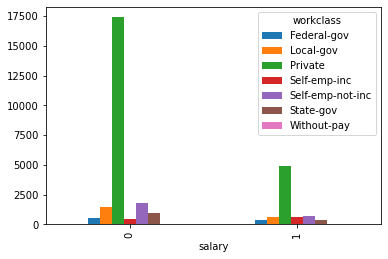

In [22]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(df['salary'],df['workclass'])
class_salary.plot(kind='bar')

* . **so we can clearly see that private class people is more than other classes in both type of category of salary**

<AxesSubplot:xlabel='education'>

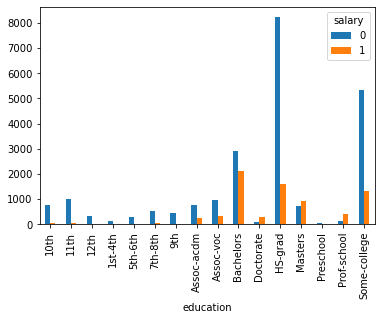

In [23]:
#cheacking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['salary'])
salary_education.plot(kind='bar')

In [24]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

        
num_col = num_col[0:2]
num_col 

['age', 'education-num']

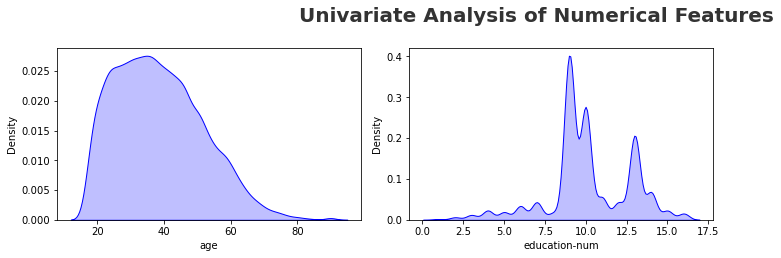

In [25]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [26]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col        

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

<Figure size 432x288 with 0 Axes>

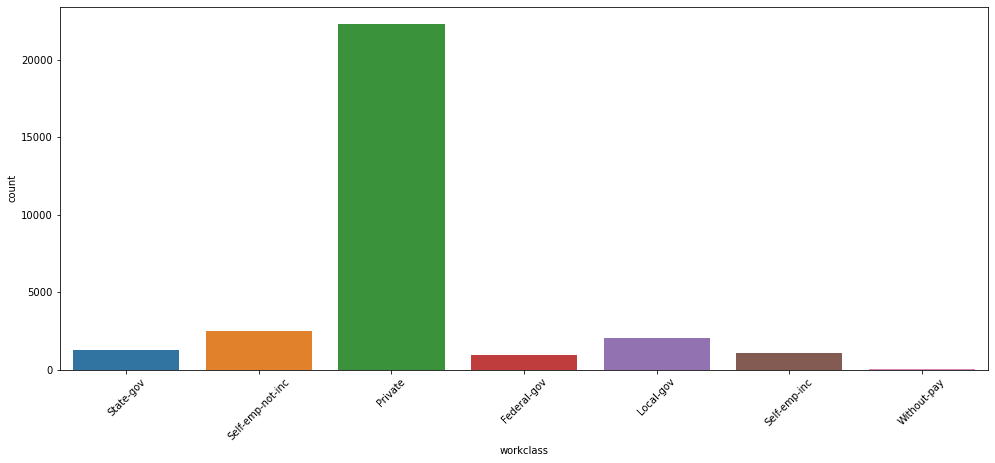

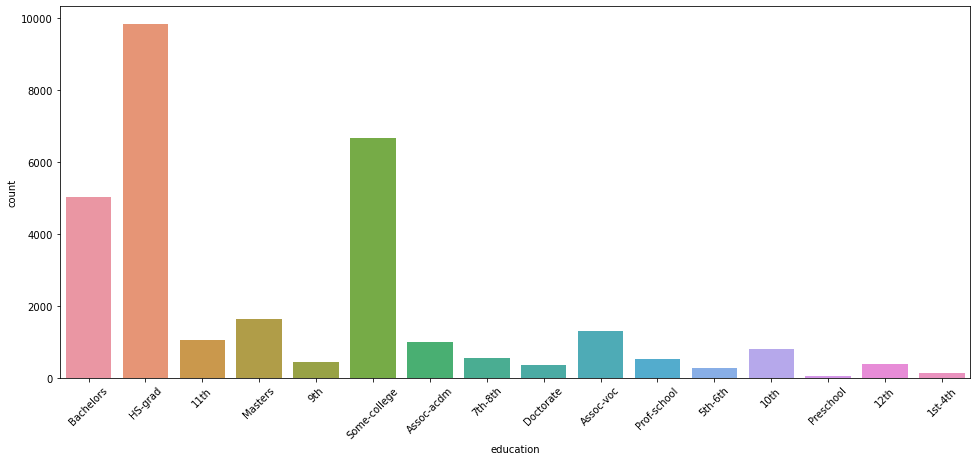

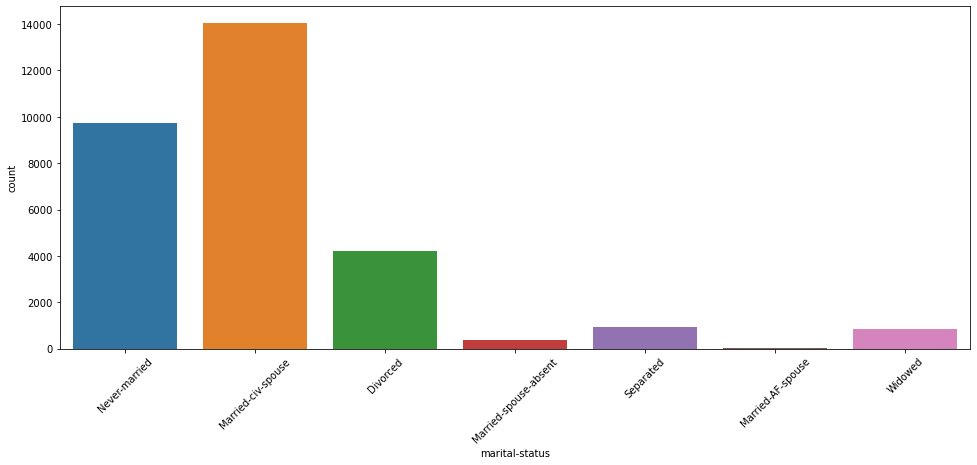

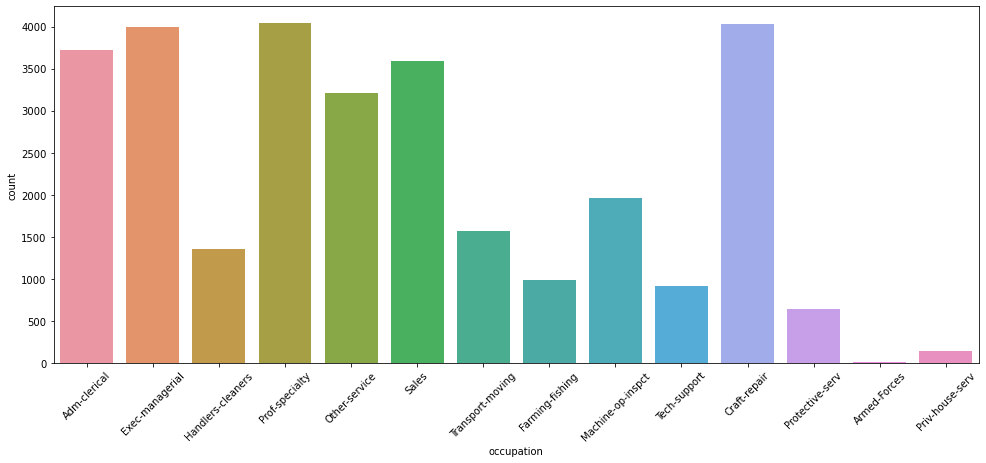

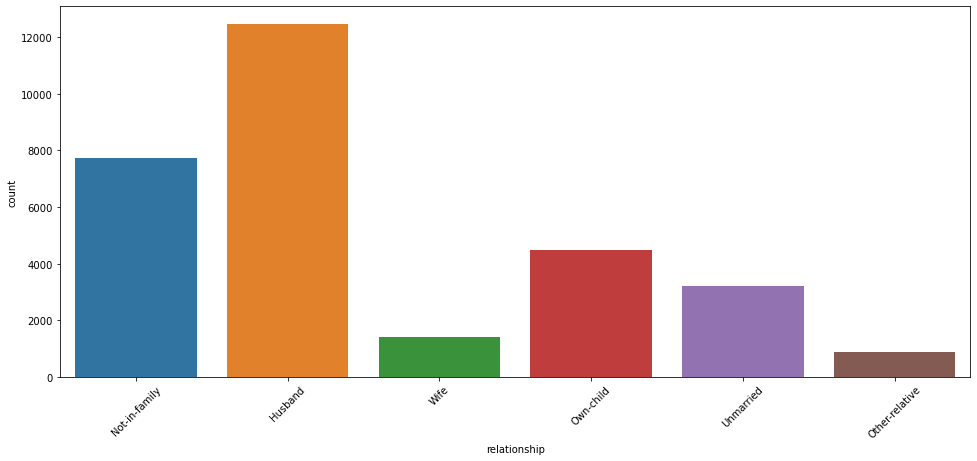

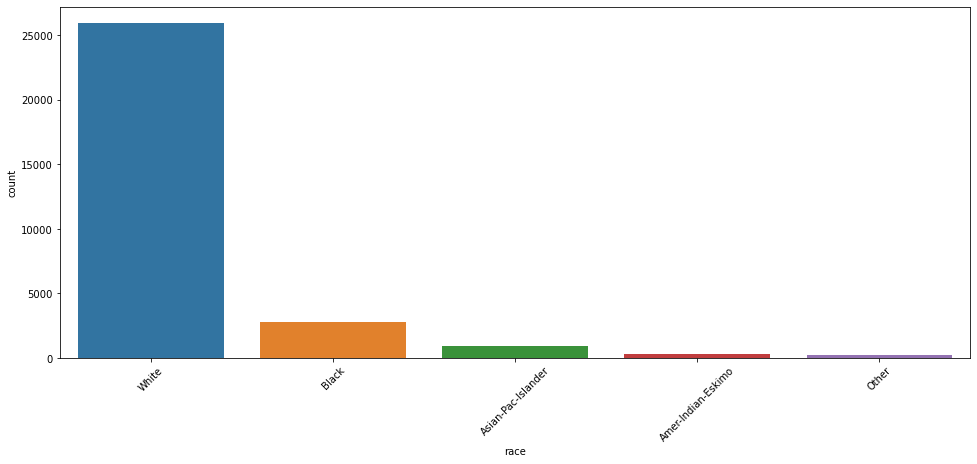

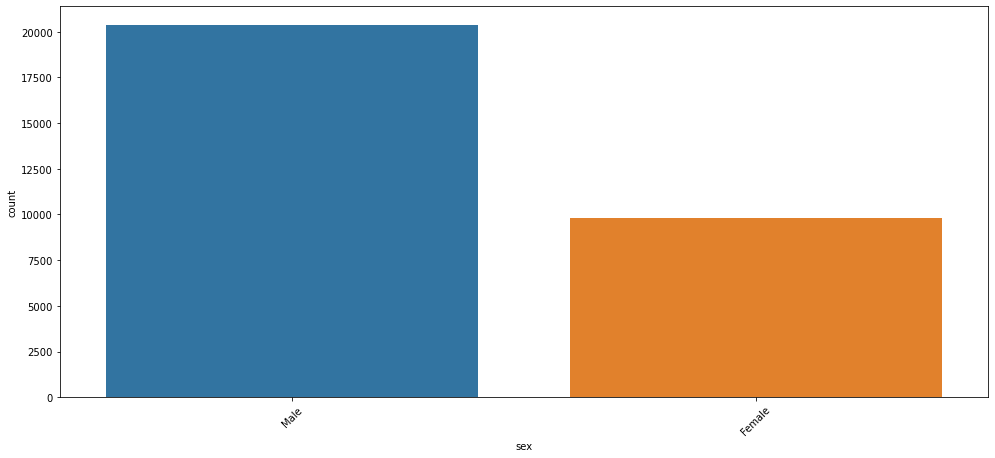

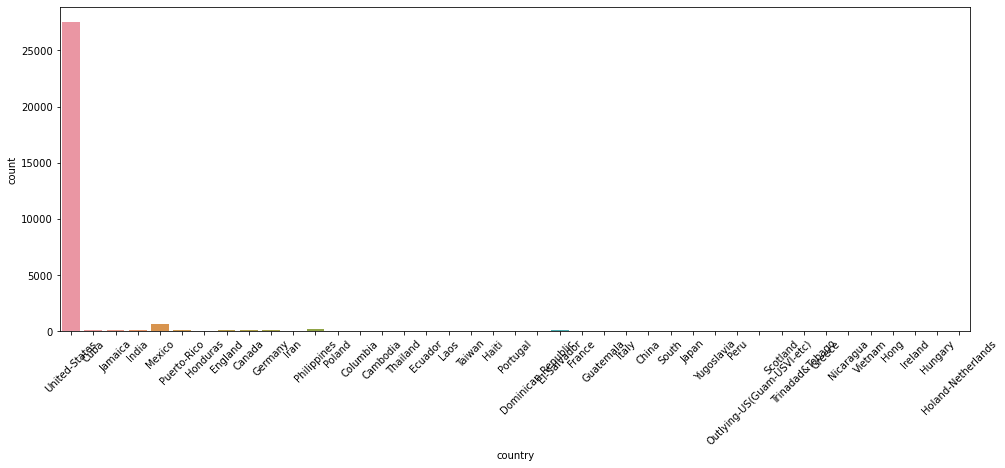

In [27]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Check Multicollinearity in Numerical features

In [28]:
df[(list(df.columns)[1:])].corr()

,education-num,hours-per-week,salary
education-num,1.000000,0.152522,0.335286
hours-per-week,0.152522,1.000000,0.229480
salary,0.335286,0.229480,1.000000


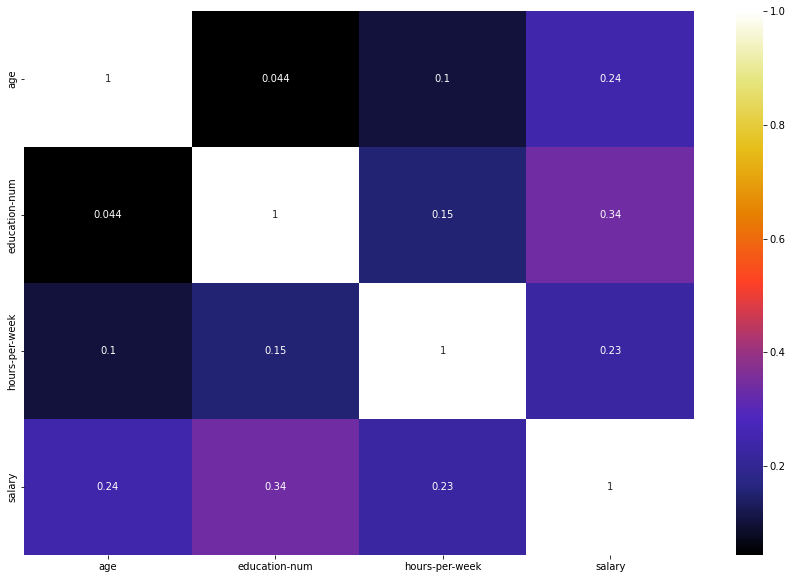

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

* . **so their is no multicollinearity in numeric feature**

### Check Multicollinearity for Categorical features

* . **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the  test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* . **A chi-square statistic is one way to show a relationship between two categorical variables.**

* . **Here we test correlation of Categorical columns with Target column i.e Salary**

In [30]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['salary'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,country,Reject Null Hypothesis


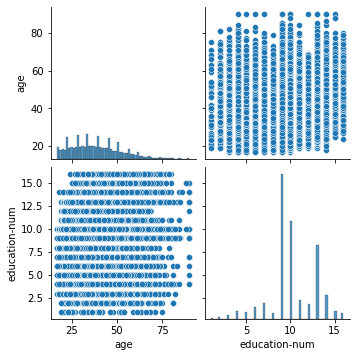

In [31]:
sns.pairplot(df[num_col])

### Checking outliers

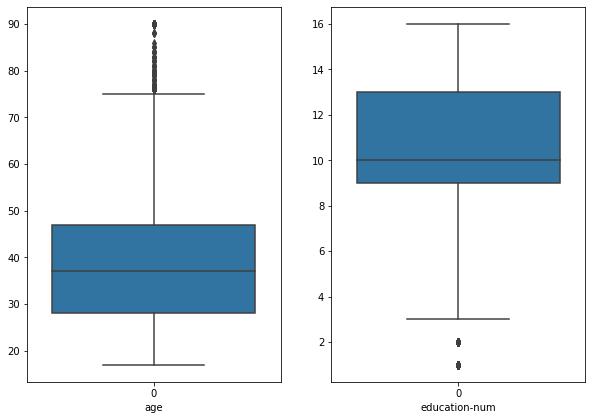

In [32]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

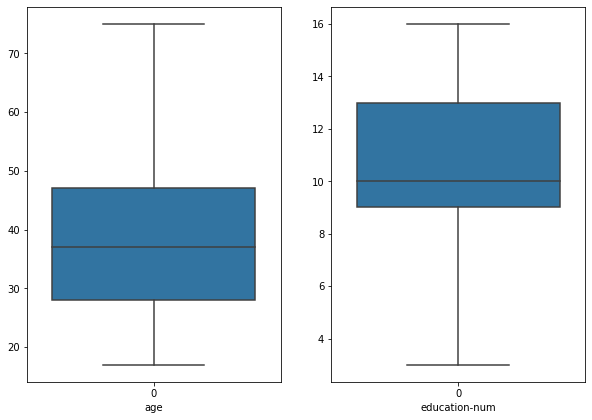

In [33]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()
replace_with_thresholds(df,num_col)
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

**creating a new copy of dataset(df) and convert it into numerical with the help of labelEncoder**

In [34]:
new_df = df.copy()

In [35]:
new_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [36]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#data.drop('salary',axis=1,inplace=True)

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()


data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country','salary'])
b = data[['age','hours-per-week']]
#c=data['hours-per-week']
new_df = pd.concat([b,a],axis=1)
new_df

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,39,40,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,50,13,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,38,40,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,53,40,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,28,40,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32557,40,40,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32558,58,40,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32559,22,20,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


In [37]:
new_df.shape

(32561, 11)

* . ***Dependent and Independent features***

In [38]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21815, 10)
(21815,)
(10746, 10)
(10746,)


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
model.score(X_train,y_train)

0.7610818244327298

In [44]:
log_pred = model.predict(X_test)
accuracy_score(y_test,log_pred)

0.7657733109994417

In [45]:
params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,100])

In [46]:
best_log_model = RandomizedSearchCV(model,params,random_state=7)
best_log_model.fit(X_train,y_train)

C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=7)

In [47]:
best_log_model.best_params_

{'penalty': 'l2', 'C': 10}

In [48]:
best_model = LogisticRegression(penalty='l2',C = 10)

In [49]:
best_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [50]:
best_pred = best_model.predict(X_test)

In [51]:
accuracy_score(y_test,best_pred)

0.7657733109994417

### RandomForest Classifier

In [52]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
model.score(X_train,y_train)

0.9736419894567958

In [54]:
model_pred = model.predict(X_test)
accuracy_score(y_test,model_pred)

0.8230039084310441

In [55]:
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

In [56]:
best_ran_model = RandomizedSearchCV(model,params,random_state=7)
best_ran_model.fit(X_train,y_train)

C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\jyoti\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jyoti\anaconda3\lib\site-packages\jo

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [57]:
best_ran_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [58]:
best_model = RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'entropy').fit(X_train,y_train)
best_model.score(X_train,y_train)

0.8486820994728398

In [59]:
best_pred = best_model.predict(X_test)
accuracy_score(y_test,best_pred)

0.8345430857993672

### Naive Bayes

In [60]:
model  = GaussianNB().fit(X_train,y_train)
model.score(X_train,y_train)

0.7593857437542975

In [61]:
model_pred = model.predict(X_test)
accuracy_score(y_test,model_pred)

0.7566536385631863

### SVC

In [62]:
svc = SVC().fit(X_train,y_train)
svc.score(X_train,y_train)

0.8138895255558102

In [63]:
svc_pred = svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.8074632421366089

* . **Hyperparameter Tunning**

In [64]:
params = dict(kernel=['linear', 'poly'],C=[1,0.1,0.01])
Grid_model = GridSearchCV(svc,params,n_jobs=-1)

In [65]:
Grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'kernel': ['linear', 'poly']})

In [66]:
Grid_model.best_params_

{'C': 1, 'kernel': 'poly'}

In [67]:
best_model = SVC(kernel='poly',gamma='scale',C=1).fit(X_train,y_train)

In [68]:
best_model.score(X_train,y_train)

0.768141187256475

In [69]:
best_pred = best_model.predict(X_test)
accuracy_score(y_test,best_pred)

0.7685650474595198

### Conclusion
* . **we got best accuracy with random forest model so we use that model in our pipeline.**